![](https://metshotcorner.com/wp-content/uploads/2016/05/2016.05.25.jpg)

# Linear Regression on Hitters Baseball Dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, ElasticNet

In [2]:
df = pd.read_csv("../input/hitters-baseball-data/Hitters.csv")

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
# understand the data
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    
check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29 

In [5]:
print("Num of Object Variables:", df.select_dtypes(object).shape[1])
print("Num of Integer Variables:", df.select_dtypes("integer").shape[1])
print("Num of Float Variables:", df.select_dtypes("float").shape[1])

Num of Object Variables: 3
Num of Integer Variables: 16
Num of Float Variables: 1


In [6]:
# Null values
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [7]:
# check the missing values
df[df.Salary.isnull()==True].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A


In [8]:
# drop null values because they are what we need to predict(salary). Check again.
df.dropna(inplace=True)
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [9]:
# Descriptive Analysis
df.describe([0.05,0.25,0.50,0.75,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
AtBat,263.0,403.642586,147.307209,19.0,181.3,282.5,413.0,526.0,617.8,668.32000,687.0
Hits,263.0,107.828897,45.125326,1.0,42.1,71.5,103.0,141.5,177.9,211.76000,238.0
HmRun,263.0,11.619772,8.757108,0.0,1.0,5.0,9.0,18.0,29.0,33.00000,40.0
Runs,263.0,54.745247,25.539816,0.0,19.1,33.5,52.0,73.0,96.8,111.42000,130.0
RBI,263.0,51.486692,25.882714,0.0,18.0,30.0,47.0,71.0,99.8,114.14000,121.0
Walks,263.0,41.114068,21.718056,0.0,12.0,23.0,37.0,57.0,78.9,94.00000,105.0
Years,263.0,7.311787,4.793616,1.0,1.0,4.0,6.0,10.0,16.9,19.38000,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,279.9,842.5,1931.0,3890.5,7120.1,8732.34000,14053.0
CHits,263.0,722.186312,648.199644,4.0,68.0,212.0,516.0,1054.0,2023.5,2481.48000,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,2.0,15.0,40.0,92.5,258.4,348.52000,548.0


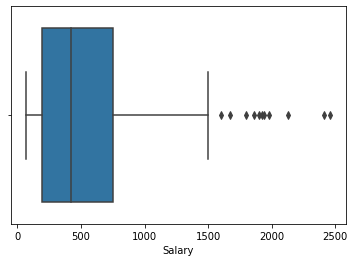

In [10]:
# Outliers
sns.boxplot(x = df["Salary"])
plt.show()

In [11]:
# determine the threshold values for outliers

def outlier_thresholds(dataframe, col_name):
    quartile1 = dataframe[col_name].quantile(0.05)
    quartile3 = dataframe[col_name].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [12]:
# limits for salary

low_limit,up_limit = outlier_thresholds(df, "Salary")
print("Low Limit : {0}  Up Limit : {1}".format(low_limit,up_limit))

Low Limit : -1802.4999999999989  Up Limit : 3235.0999999999976


In [13]:
# replace outliers with thresholds

def replace_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if low_limit > 0:
        dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    else:
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [14]:
# numerical variables
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
print('\n',num_cols)


 ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']


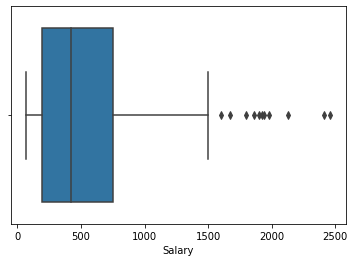

In [15]:
#Outlier analysis for numerical variables
for col in num_cols:
    replace_with_thresholds(df, col)
    
# Outliers in the dependent variable have been eliminated
sns.boxplot(x = df["Salary"])
plt.show()

In [16]:
# check_outliers for salary

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

check_outlier(df, "Salary")

False

In [17]:
# correlation analysis
df.corr(method="pearson")

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.225341,0.212422,0.237278,0.221393,0.132926,0.309607,0.342117,0.325577,0.394771
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.235606,0.189364,0.238896,0.219384,0.122971,0.299688,0.303975,0.279876,0.438675
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.217496,0.492526,0.258347,0.349858,0.227183,0.250931,-0.161602,-0.009743,0.343028
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,-0.011975,0.171811,0.191327,0.229701,0.237831,0.202335,0.163700,0.271160,0.179258,0.192609,0.419859
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.292137,0.442190,0.307226,0.387777,0.233619,0.312065,0.062902,0.150155,0.449457
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.270795,0.349582,0.332977,0.312697,0.429140,0.280855,0.102523,0.081937,0.443867
Years,0.012725,0.018598,0.113488,-0.011975,0.129668,0.134793,1.000000,0.915681,0.897844,0.722371,0.876649,0.863809,0.837524,-0.020019,-0.085118,-0.156512,0.400657
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995057,0.801676,0.982747,0.950730,0.906712,0.053393,-0.007897,-0.070478,0.526135
CHits,0.225341,0.235606,0.217496,0.191327,0.292137,0.270795,0.897844,0.995057,1.000000,0.786652,0.984542,0.946797,0.890718,0.067348,-0.013144,-0.068036,0.548910
CHmRun,0.212422,0.189364,0.492526,0.229701,0.442190,0.349582,0.722371,0.801676,0.786652,1.000000,0.825625,0.927903,0.810878,0.093822,-0.188886,-0.165369,0.524931


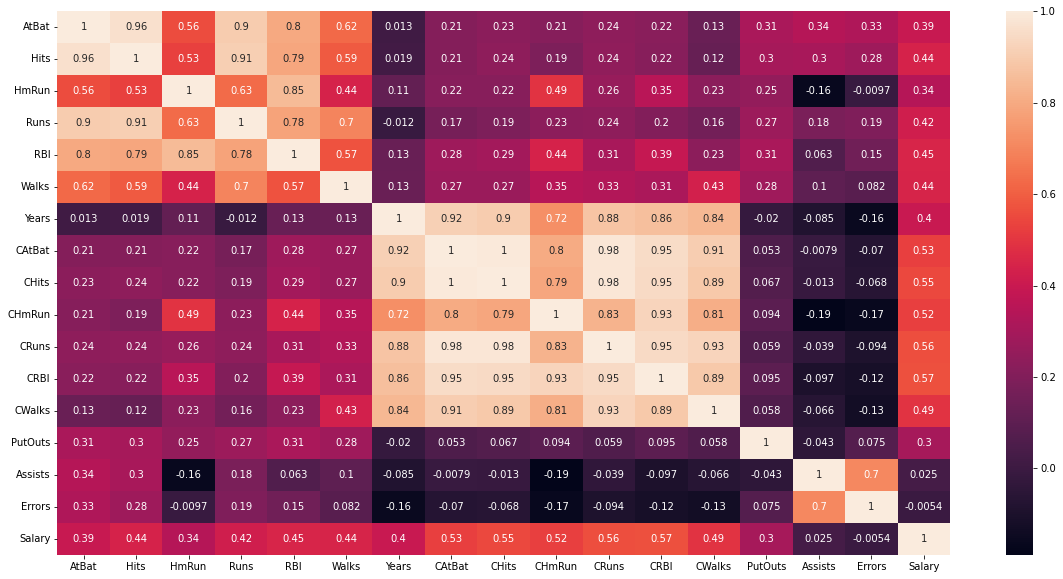

In [18]:
# correlation analysis before feature engineering

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True );

In [19]:
def grab_col_names(dataframe, cat_th=10, car_th=20):    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [20]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols

Observations: 263
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


['League', 'Division', 'NewLeague']

In [21]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [22]:
cat_but_car

[]

In [23]:
# encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]

In [24]:
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

In [25]:
#one hot encoding
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
df=pd.get_dummies(df, columns=ohe_cols, drop_first=True)

In [26]:
#standardization
from sklearn.preprocessing import MinMaxScaler

for col in num_cols:
        transformer = MinMaxScaler().fit(df[[col]])
        df[col] = transformer.transform(df[[col]])

In [27]:
# set model before feature engineering
from sklearn.linear_model import LinearRegression
y = df["Salary"]
X = df.drop(["Salary"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [28]:
# Faeture Importance
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    
#plot_importance(LR, X_test)

In [29]:
def train_model(model,name):
    
    model.fit(X_train, y_train)
    y_pred_1 = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print(model.intercept_)
    print(model.coef_)
    
    return model, y_pred_1, y_pred

In [30]:
LinReg, y_pred_1, y_pred = train_model(LinearRegression(),"LinearRegressor")

-0.026036197066735434
[-0.41283496  0.7352444   0.08002128 -0.1550935  -0.07297316  0.24372274
  0.07745806 -1.35113422  0.19384429 -0.10764172  1.5254158   0.65173623
 -0.53676617  0.04512478 -0.04758365  0.14269429  0.04645836 -0.0087055
 -0.02664614]


In [31]:
print("Train RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train, y_pred_1))))
print("Test RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))), "\n")
          
print("Train MAE:", "{:,.2f}".format(mean_absolute_error(y_train, y_pred_1)))
print("Test MAE:", "{:,.2f}".format(mean_absolute_error(y_test, y_pred)), "\n")
      
print("Train R^2:", "{:,.2f}".format(r2_score(y_train, y_pred_1)))
print("Test R^2:", "{:,.2f}".format(r2_score(y_test, y_pred)))

Train RMSE: 0.12
Test RMSE: 0.15 

Train MAE: 0.09
Test MAE: 0.09 

Train R^2: 0.59
Test R^2: 0.29


In [32]:
LinReg.score(X_test, y_test)

0.2907451855798152

In [33]:
# As we can see, our accuracy is so low, therefore we need to create different features
# Below will be updated constantly as I work on it.

In [34]:
df = pd.read_csv("../input/hitters-baseball-data/Hitters.csv")
df.dropna(inplace=True)
df.isnull().sum()
low_limit,up_limit = outlier_thresholds(df, "Salary")
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

for col in num_cols:
    replace_with_thresholds(df, col)
    
check_outlier(df, "Salary")

False

In [35]:
df["CAtBat_y"]=df["CAtBat"]/df["Years"]
df["CHits_y"]=df["CHits"]/df["Years"]
df["CHmRun_y"]=df["CHmRun"]/df["Years"]
df["CRuns_y"]=df['CRuns']/df["Years"]
df["CRBI_y"]=df["CRBI"]/df["Years"]
df["CWalks_y"]=df["CWalks"]/df["Years"]

In [36]:
df["n_Walks"]=df["Walks"]/df["CWalks"]
df["n_Atbat"]=df["AtBat"]/df["CAtBat"]
df["n_Hits"]=df["Hits"]/df["CHits"]
df["n_Runs"]=df["Runs"]/df['CRuns']
df["n_RBI"]=df["RBI"]/df["CRBI"]

In [37]:
df["RBI_Walks"]=df["RBI"]*df["Walks"]

In [38]:
df['Runs_CRuns_y'] = df['Runs'] / (df['CRuns'] * df['Years'])

In [39]:
df.loc[(df["Runs"] > df["CRuns_y"]),"new_runs"] = 1
df.loc[(df["Runs"] <= df["CRuns_y"]),"new_runs"] = 0

In [40]:
def gen(df,c,a,b,t,y,y1,y2):
    df.loc[(df[c] < a), t] = y
    df.loc[(df[c] >= a) & (df[c] < b), t] = y1
    df.loc[(df[c] >= b), t] = y2
    return df[t]
gen(df,"Years",4,11,"experience","beginner","intermediate","senior")
gen(df,"Errors",3,11,"condition","verygood","good","bad")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,n_Walks,n_Atbat,n_Hits,n_Runs,n_RBI,RBI_Walks,Runs_CRuns_y,new_runs,experience,condition
1,315.0,81.0,7,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,...,0.104000,0.091331,0.097006,0.074766,0.091787,1482.0,0.005340,1.0,senior,good
2,479.0,130.0,18,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,...,0.288973,0.294951,0.284464,0.294643,0.270677,5472.0,0.098214,0.0,beginner,bad
3,496.0,141.0,20,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,...,0.104520,0.088131,0.089524,0.078502,0.093079,2886.0,0.007137,0.0,senior,good
4,321.0,87.0,10,39.0,42.0,30.0,2.0,396.0,101.0,12.0,...,0.909091,0.810606,0.861386,0.812500,0.913043,1260.0,0.406250,1.0,beginner,good
5,594.0,169.0,4,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,...,0.180412,0.134755,0.149162,0.147705,0.151786,1785.0,0.013428,1.0,senior,bad


In [41]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 36
cat_cols: 6
num_cols: 30
cat_but_car: 0
num_but_cat: 1


Variables were 20, now we have 36

In [42]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]and df[col].nunique() == 2]                                     


In [43]:
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

In [44]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
                                       
df=pd.get_dummies(df, columns=ohe_cols, drop_first=True)

In [45]:
for col in num_cols:
        transformer = MinMaxScaler().fit(df[[col]])
        df[col] = transformer.transform(df[[col]])

In [46]:
X = df.drop(["Salary"], axis=1)
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)
LinReg2, y_pred_n_2, y_pred_2 = train_model(LinearRegression(),"LinearRegressor")

0.17529920158851764
[-0.18246227  0.48882716 -0.10496073 -0.06410721 -0.27016883 -0.14935878
 -0.32108236 -1.22320581 -0.23713001 -0.52948674  1.73629404  1.14125723
 -0.55976368  0.00889611 -0.03622638  0.0968451   0.01429291  0.17180519
  0.01602759 -0.4618358   0.58653114  0.37473112 -0.27190773 -0.33887817
  0.16575869  0.01487362  0.38240114 -0.29909966 -0.62045987  0.04886663
  0.53782424  0.27916694  0.01728335  0.06792894  0.03428305  0.06662726
  0.04862961]


In [47]:
print("Train RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train, y_pred_n_2))))
print("Test RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))), "\n")
          
print("Train MAE:", "{:,.2f}".format(mean_absolute_error(y_train, y_pred_n_2)))
print("Test MAE:", "{:,.2f}".format(mean_absolute_error(y_test, y_pred)), "\n")
      
print("Train R^2:", "{:,.2f}".format(r2_score(y_train, y_pred_n_2)))
print("Test R^2:", "{:,.2f}".format(r2_score(y_test, y_pred)))

Train RMSE: 0.10
Test RMSE: 0.15 

Train MAE: 0.07
Test MAE: 0.09 

Train R^2: 0.73
Test R^2: 0.29


In [48]:
LinReg2.score(X_test, y_test)

0.6514840450747998

Just with a simple feature engineering, we boost our score from 0.29 to 0.65